<a href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/NLP/N_grams_expectativas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_datos = "/content/drive/MyDrive/Expectativa.csv"

In [ ]:
#nltk.download('stopwords')

In [ ]:
import pandas as pd
import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

In [ ]:
datos = pd.read_csv(path_datos)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                       --------------  ----- 
 0   Marca temporal                                                                                                                               21 non-null     object
 1   Apellidos                                                                                                                                    21 non-null     object
 2   Nombres                                                                                                                                      21 non-null     object
 3   1. ¿Cuales son las expectativas de aprendizaje 

In [ ]:
def cleanReviews(documents):
    cleanedReviews = []
    for document in documents:
        s = re.sub(r'[^a-zA-Z0-9\s]', '', document)
        s = re.sub('\s+',' ', s)
        s = str(s).lower()
        tokens = [token for token in s.split(" ") if token != ""]
        tokens = [word for word in tokens if word not in stopwords.words('spanish')]
        tokens = [word for word in tokens if word not in ['alexa', 'echo', 'dot','quiero','gustara',]]
        review = ' '.join(tokens)
        cleanedReviews.append(review)
    return(cleanedReviews)

In [ ]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [ ]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)

    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

In [ ]:
def textTrends(documents):
    cleanedReviews = cleanReviews(documents)

    plotNgrams(cleanedReviews)

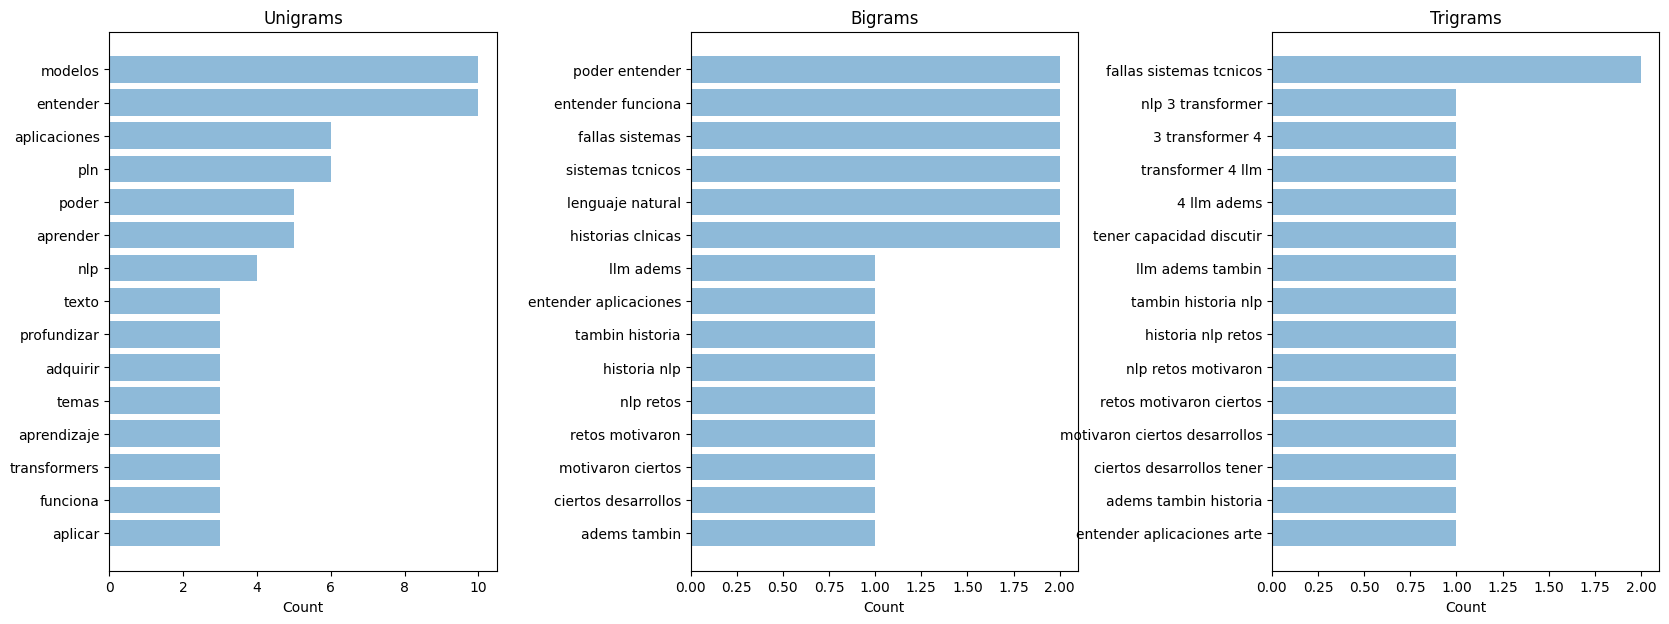

In [ ]:
textTrends(datos['1. ¿Cuales son las expectativas de aprendizaje sobre el curso de PLN?'])